<a href="https://colab.research.google.com/github/prathamsss/Car-Damage-Project/blob/master/Car_Damage_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Installation Guide"""
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())


!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 4.1MB/s 
     |████████████████████████████████| 2.2MB 12.3MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201218-cp36-none-any.whl size=40701 sha256=81641464055fe24103de19aa08c6013a7b90362959620050e30a3981cbd3e988
  Stored in directory: /root/.cache/pip/wheels/b5/83/3f/e74a72d264351b5ada512da845a5c6abb81a34f6333c3a54ce
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10508 sha256=d93c28b77f349b26fb49e144835770b2d0d4805ffab7c32d3eecc2a7ee037524
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.

In [ ]:
"""Libraries to be imported"""
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
import os
import random
# import some common libraries
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog
from detectron2.utils.visualizer import Visualizer
import matplotlib.image as mpimg
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.catalog import Metadata
import torch
from torchvision import datasets, transforms, models
import torchvision
from torchvision import datasets, models, transforms
from PIL import Image
from torch.autograd import Variable
#import torch.utils.data as data
#from torch.utils.data import Dataset
from torch.utils.data import DataLoader, Dataset
# %matplotlib inline
from numpy import asarray
from detectron2.evaluation import COCOEvaluator
import os
test_json = os.path.join("/content/test/test_coco.json")
output_dir = "/content/output_test.json"
import contextlib
import copy

%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import io
import itertools
import json
import logging
import numpy as np
import os
import pickle
from collections import OrderedDict
import pycocotools.mask as mask_util
import torch
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from tabulate import tabulate

import detectron2.utils.comm as comm
from detectron2.config import CfgNode
from detectron2.data import MetadataCatalog
from detectron2.data.datasets.coco import convert_to_coco_json
from detectron2.evaluation.fast_eval_api import COCOeval_opt
from detectron2.structures import Boxes, BoxMode, pairwise_iou
from detectron2.utils.file_io import PathManager
from detectron2.utils.logger import create_small_table
import json

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [ ]:
single_model ="/content/drive/MyDrive/Car damage /Trained Model/output/Single_label_2kIteration (1) (2).pth"
three_model = "/content/drive/MyDrive/Car damage /Trained Model/output/model_final_2kiteration_3classes.pth"
damage ="/content/drive/My Drive/Car damage /Trained Model/One_set_resnet_18.pth"


/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


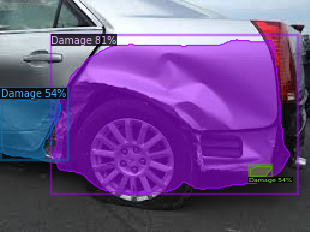

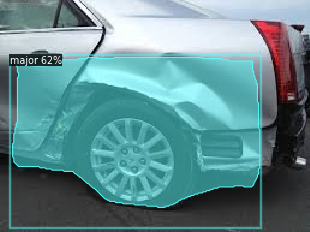

{'instances': Instances(num_instances=1, image_height=194, image_width=259, fields=[pred_boxes: Boxes(tensor([[  8.0327,  46.6395, 217.8732, 191.0791]], device='cuda:0')), scores: tensor([0.6225], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]], device='cuda:0')])}

In [ ]:
class Car_Damage(object):
  def __init__(self,single_label_model,locate_thress,three_label_model,three_thress):
    global predictor_single,my_metadata_single,predictor_three_class,my_metadata_three_class
    cfg_s = get_cfg()
    cfg_s.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x.yaml"))
    cfg_s.MODEL.WEIGHTS = os.path.join(cfg_s.OUTPUT_DIR, single_label_model)
    cfg_s.MODEL.ROI_HEADS.NUM_CLASSES = 1

    cfg_s.MODEL.RPN.NMS_THRESH = 0.02    # set the testing threshold for this model
    cfg_s.MODEL.ROI_HEADS.SCORE_THRESH_TEST = locate_thress
    cfg_s.MODEL.RPN.NMS_THRESH = 0.5

    predictor_single = DefaultPredictor(cfg_s)
    my_metadata_single = Metadata()

    my_metadata_single.set(thing_classes = ['Damage'])



    cfg_t = get_cfg()
    cfg_t.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x.yaml"))
    cfg_t.MODEL.WEIGHTS = os.path.join(cfg_t.OUTPUT_DIR, three_label_model)
    cfg_t.MODEL.ROI_HEADS.SCORE_THRESH_TEST = three_thress
    cfg_t.MODEL.ROI_HEADS.NUM_CLASSES = 3

    cfg_t.MODEL.RPN.NMS_THRESH = 0.02    # set the testing threshold for this model
    predictor_three_class = DefaultPredictor(cfg_t)
    my_metadata_three_class = Metadata()

    my_metadata_three_class.set(thing_classes = ['major', 'saviour', 'minor'])

  def locate_car_damage(self, img):
    im = cv2.imread(img)
    outputs = predictor_single(im)
    v = Visualizer(im[:, :, ::-1], my_metadata_single, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imwrite("locate_car_damage.bmp",v.get_image()[:, :, ::-1])
    cv2_imshow(v.get_image()[:, :, ::-1])
    return outputs #(v.get_image()[:, :, ::-1],outputs['instances'].to('cpu').pred_masks)

  def identify_damage_severity(self, img):
    im = cv2.imread(img)
    outputs = predictor_three_class(im)
    v = Visualizer(im[:, :, ::-1], my_metadata_three_class, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imwrite("identify_damage_severity.bmp",v.get_image()[:, :, ::-1])
    cv2_imshow(v.get_image()[:, :, ::-1])
    return outputs  


img = '/content/drive/MyDrive/cardamage.jpeg'
c= Car_Damage(single_model,0.54,three_model,0.3)


c.locate_car_damage(img)
c.identify_damage_severity(img)